# Data and pipeline visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate


%matplotlib inline
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None 

# data loading
path = '../datasets/preprocessed/'
# dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfratfil  = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')

dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
dfrat.describe()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
count,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06
mean,9.073073e+04,3.780447e+02,4.171135e-03,1.126962e-01,-1.757355e-02,-1.764554e-02,-1.764985e-01,-5.330155e-02,3.427937e+00
std,5.483929e+04,2.284971e+02,5.472566e-02,5.773475e-02,5.453772e-02,5.957492e-01,4.486547e-01,6.399129e-01,2.165823e+00
min,0.000000e+00,0.000000e+00,-9.420275e-02,4.327843e-02,-9.999978e-02,-9.999981e-01,-9.999986e-01,-9.999998e-01,0.000000e+00
25%,4.533000e+04,1.888750e+02,-4.663273e-02,7.851390e-02,-6.850875e-02,-5.427750e-01,-5.608227e-01,-6.578161e-01,2.000000e+00
50%,8.876300e+04,3.698459e+02,8.407816e-04,9.655091e-02,-2.171306e-02,-2.256700e-02,-1.453605e-01,-7.001106e-02,3.000000e+00
75%,1.312200e+05,5.467500e+02,5.410460e-02,1.157454e-01,3.207740e-02,5.280534e-01,1.285384e-01,5.372806e-01,5.000000e+00
max,2.452310e+05,1.021796e+03,1.274465e-01,2.999993e-01,8.559266e-02,9.999951e-01,9.761727e-01,9.999952e-01,7.000000e+00


In [3]:
import datashader as ds
from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0


## Data visualization

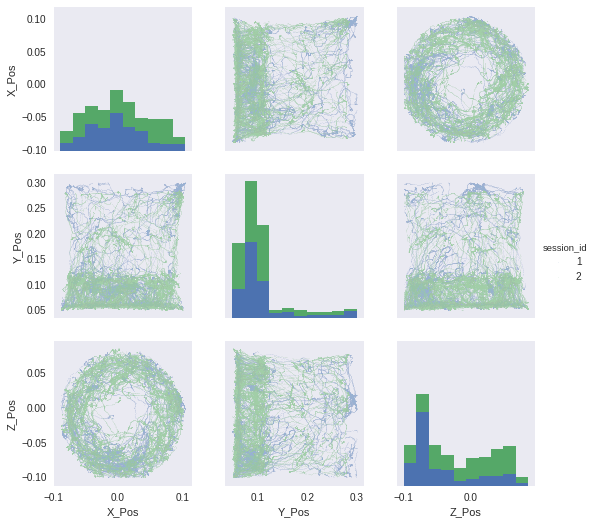

In [4]:
#point size and alpha
sns.pairplot(dfrat, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={'s':1, 'alpha':0.1}, hue='session_id', hue_order=[1,2]);

In [5]:
from matplotlib import colors

def make_heatmap(x, y, bins=20, cmap='viridis', norm=colors.Normalize(), **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower', norm=norm)


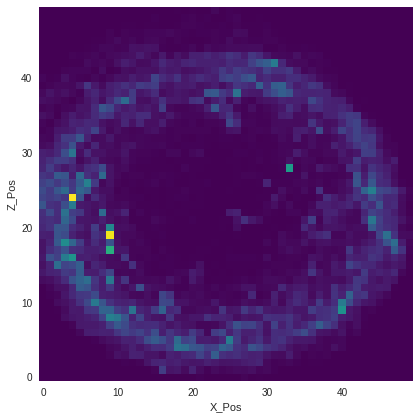

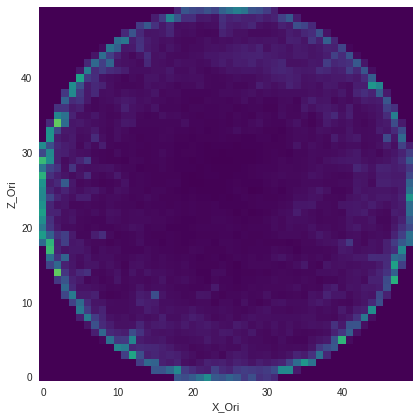

In [23]:
g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=50)

g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Ori','Z_Ori', bins=50)


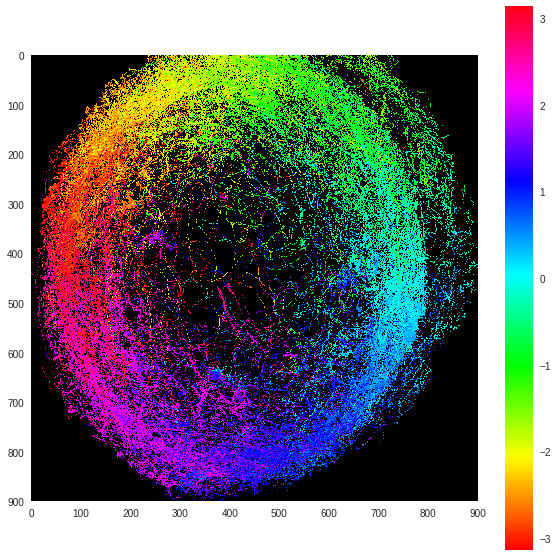

In [7]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()

## Data filtering

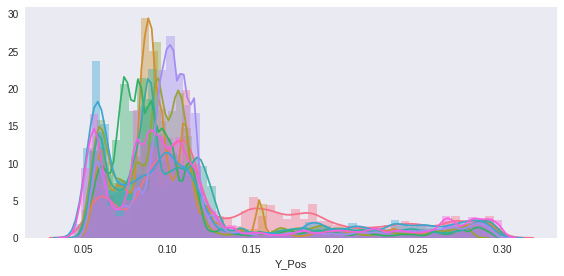

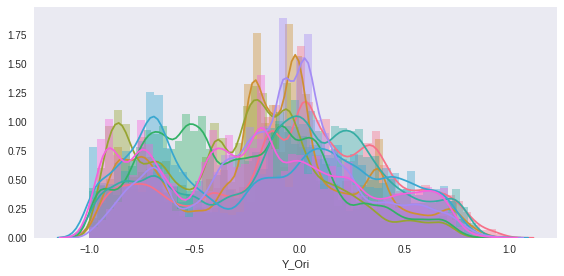

In [8]:
# postiion distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

# oritentation distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');



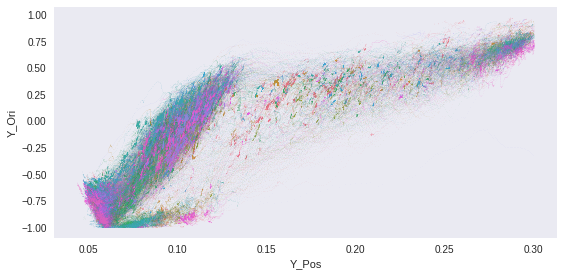

In [9]:
# scatter between orientation and position
g = sns.FacetGrid( data=dfrat, size=4, aspect=2, hue='session_id');
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);


In [10]:
rearinglimit = 0.13
dfratrear = dfrat[dfrat['Y_Pos'] < rearinglimit]
#filtering the dataset
dfratclean = pd.DataFrame()
dfratclean = dfratrear[(dfratrear['Y_Ori'] >-0.75) & (dfratrear['Y_Pos'] > 0.07)]

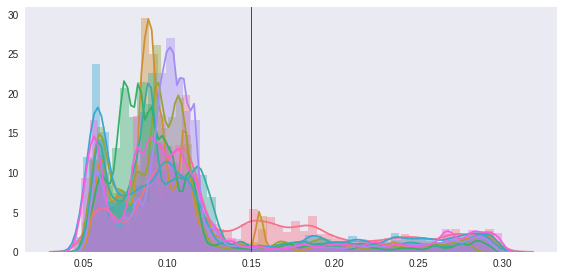

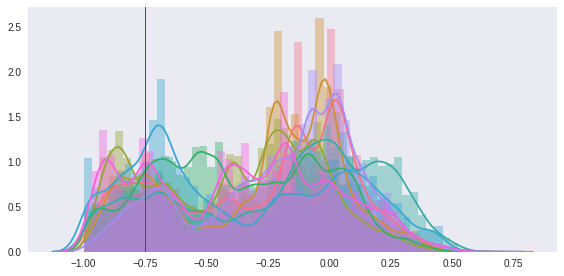

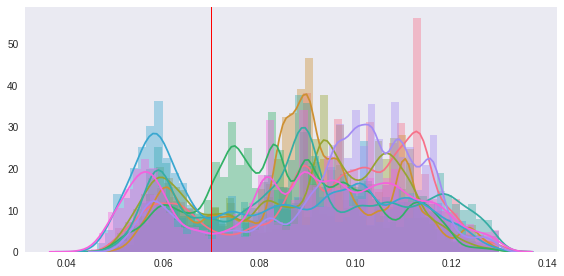

In [11]:
g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');
g.map(plt.axvline, x=0.15, alpha=1, linewidth=1, color='red');

# distribution per experiment + filetered lines
g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');
g.map(plt.axvline, x=-0.75, alpha=1, linewidth=1, color='red');

g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2)#, hue_order=[4,5])
g.map(sns.distplot, 'Y_Pos');
g.map(plt.axvline, x=0.07, alpha=1, linewidth=1, color='red');

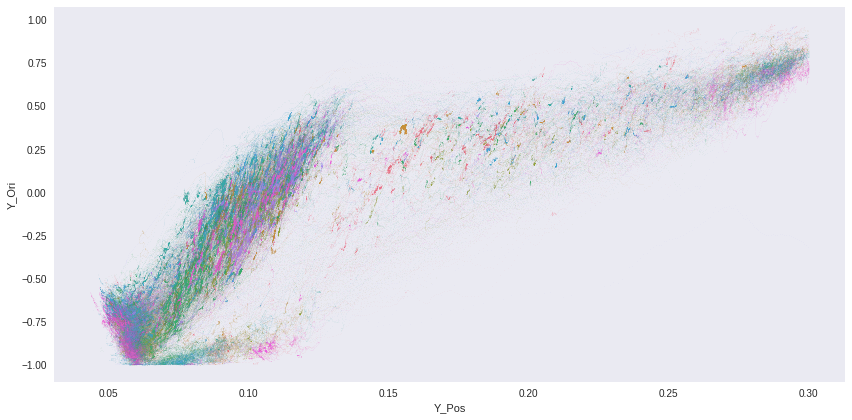

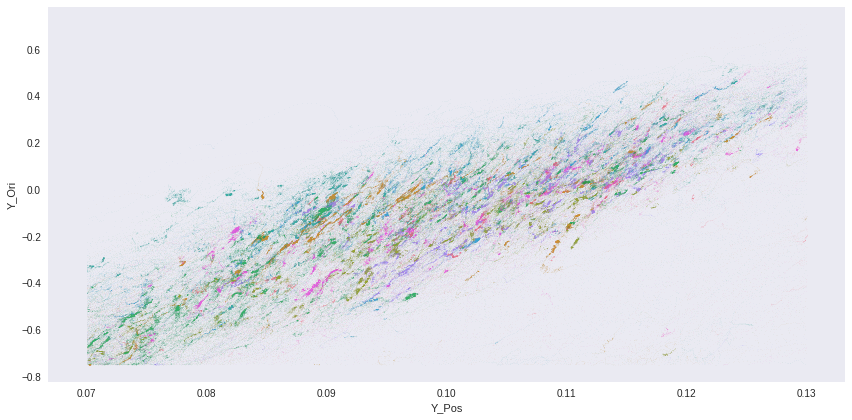

In [25]:
# scatter between orientation and position
g = sns.FacetGrid( data=dfrat, size=6, aspect=2, hue='session_id');
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

# relationship between position and orientation in Y axis after filtering
g = sns.FacetGrid( data=dfratclean, size=6, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

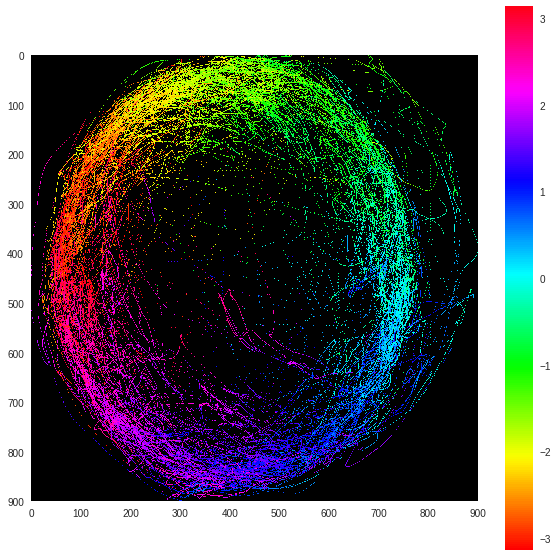

In [13]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfratfil, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfratfil, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()

## Head velocity 

In [14]:
dfratv.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,lVo,lx1,lz1,V1,lx2,lz2,clockwise,theta,U,UM
index,,,,,,,,,,,,,,,,,,,,
1,291,1.212500,-0.019489,0.098921,0.039769,-0.415185,-0.116979,0.780241,0,0.004167,237.294164,-0.469757,0.882796,0.003725,-0.484145,0.874988,1,0.016371,225.095621,NaN
2,292,1.216667,-0.018301,0.099490,0.041191,-0.401292,-0.115907,0.785460,0,0.004167,237.294164,-0.454962,0.890511,0.003717,-0.469757,0.882796,1,0.016686,229.429018,NaN
3,293,1.220833,-0.017100,0.100036,0.042615,-0.387157,-0.114871,0.790418,0,0.004166,237.294164,-0.439879,0.898057,0.003709,-0.454962,0.890511,1,0.016865,231.951156,NaN
4,294,1.225000,-0.015899,0.100563,0.044030,-0.373016,-0.114221,0.794885,0,0.004167,237.294164,-0.424820,0.905278,0.003700,-0.439879,0.898057,1,0.016701,229.638497,NaN
5,295,1.229167,-0.014693,0.101090,0.045442,-0.358822,-0.113520,0.799319,0,0.004167,237.294164,-0.409538,0.912293,0.003692,-0.424820,0.905278,1,0.016816,231.219811,NaN


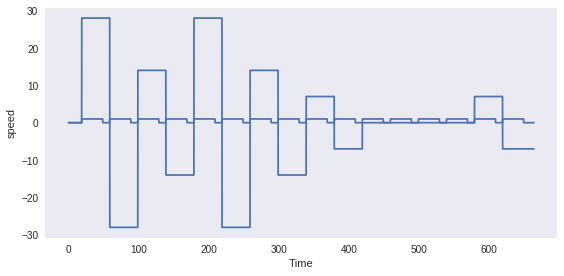

In [15]:
i = 0
dfevent1 = dfevent[dfevent['session_id']==i]
g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "speed", "Time", "visible")


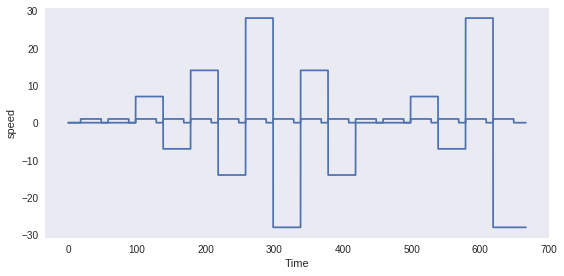

In [16]:
i = 5
dfevent1 = dfevent[dfevent['session_id']==i]
g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "speed", "Time", "visible")


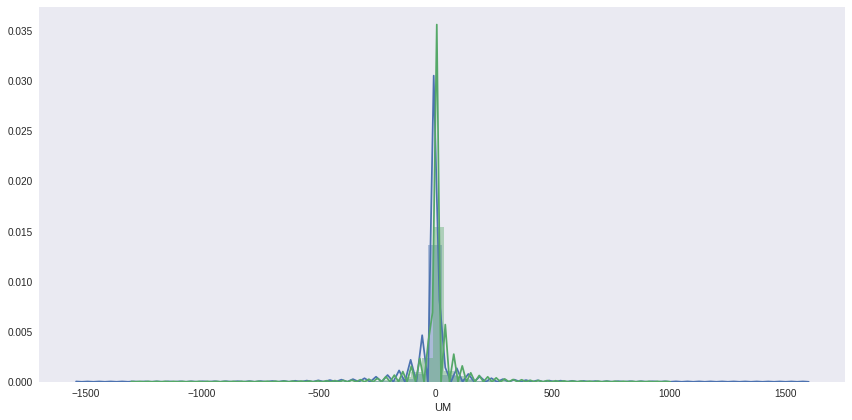

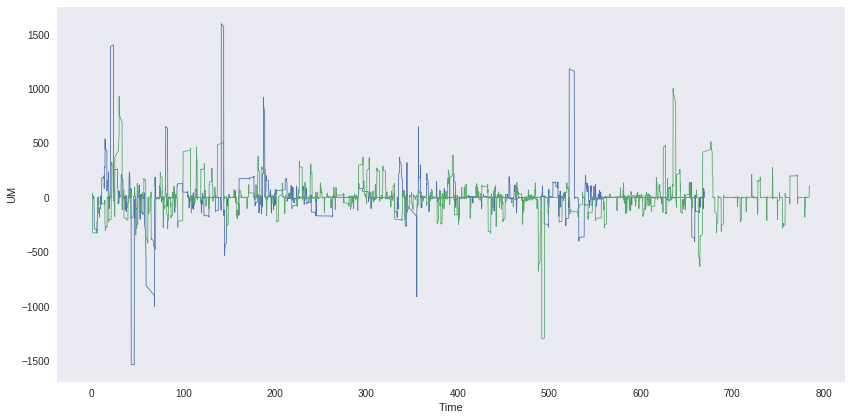

In [17]:
## ANGULAR VELOCITY IN Y AXIS
g = sns.FacetGrid(hue='session_id', data=dfratv, size=6, aspect=2, hue_order=[1,2])
g.map(sns.distplot, 'UM');

g = sns.FacetGrid(hue='session_id', data=dfratv, size=6, aspect=2, hue_order=[1,2])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=0.8);


In [18]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['subUM']= df['speed'] - df['UM'] 
df['subU'] = df['speed'] - df['U'] 
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [19]:
DmaxPerc = 0.2
df['Dmax'] = df.speed * DmaxPerc

df['SRB_U']   = np.absolute(df['subU'].values)  < np.absolute(df['Dmax'].values)
df['SRB_UM']  = np.absolute(df['subUM'].values) < np.absolute(df['Dmax'].values)

## SRB PER EXPERIMENT
sumFrameexp  = {}
sumSRBexp_UM = {}
sumSRBexp_U  = {}

for i, dd in df.groupby('session_id'):
    sumFrameexp[i] = len(dd.Frame)    
    sumSRBexp_U[i] = len(dd[dd['SRB_U']])
    print('stimulus-related behavior exp %d UM : %f%%'  % (i, sumSRBexp_U[i]  * 100 / sumFrameexp[i]))

print()
for i, dd in df.groupby('session_id'):
    sumSRBexp_UM[i] = len(dd[dd['SRB_UM']])    
    print('stimulus-related behavior exp %d UM : %f%%'  % (i, sumSRBexp_UM[i]  * 100 / sumFrameexp[i]))


stimulus-related behavior exp 0 UM : 3.645563%
stimulus-related behavior exp 1 UM : 2.601674%
stimulus-related behavior exp 2 UM : 6.651869%
stimulus-related behavior exp 3 UM : 4.638721%
stimulus-related behavior exp 4 UM : 6.322745%
stimulus-related behavior exp 5 UM : 7.580809%
stimulus-related behavior exp 6 UM : 3.831239%
stimulus-related behavior exp 7 UM : 3.775151%

stimulus-related behavior exp 0 UM : 3.337145%
stimulus-related behavior exp 1 UM : 2.538051%
stimulus-related behavior exp 2 UM : 6.656399%
stimulus-related behavior exp 3 UM : 4.400806%
stimulus-related behavior exp 4 UM : 6.111755%
stimulus-related behavior exp 5 UM : 7.418017%
stimulus-related behavior exp 6 UM : 3.740852%
stimulus-related behavior exp 7 UM : 3.879248%


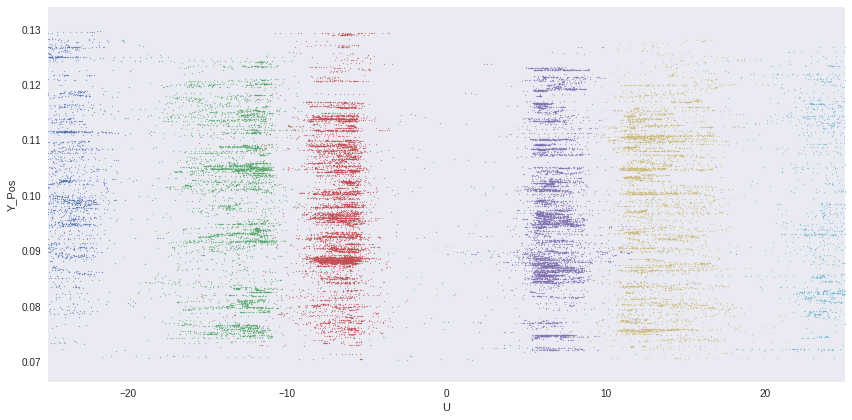

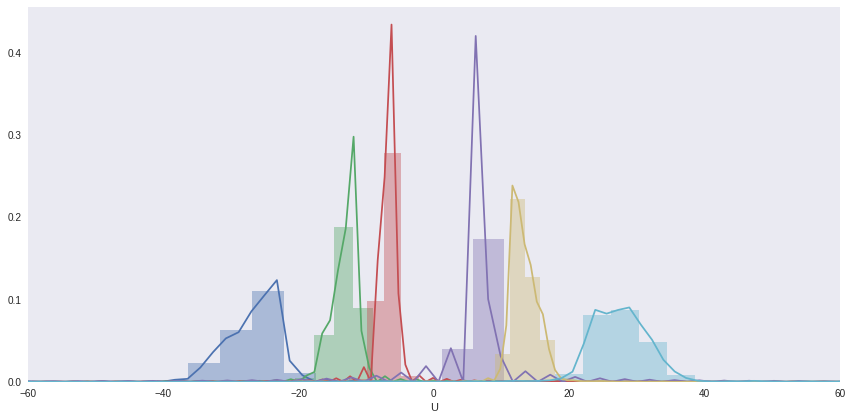

In [20]:
g = sns.FacetGrid( data=df[df['SRB_UM']], size=6, aspect=2, xlim=[-25,25], hue='speed')
g.map(plt.scatter,'U', "Y_Pos", alpha=0.5, s=1);

g = sns.FacetGrid( data=df[(df['SRB_UM'])], size=6, aspect=2, hue='speed', xlim=[-60,60])#, hue_order=[1,2])
g.map(sns.distplot, 'U');

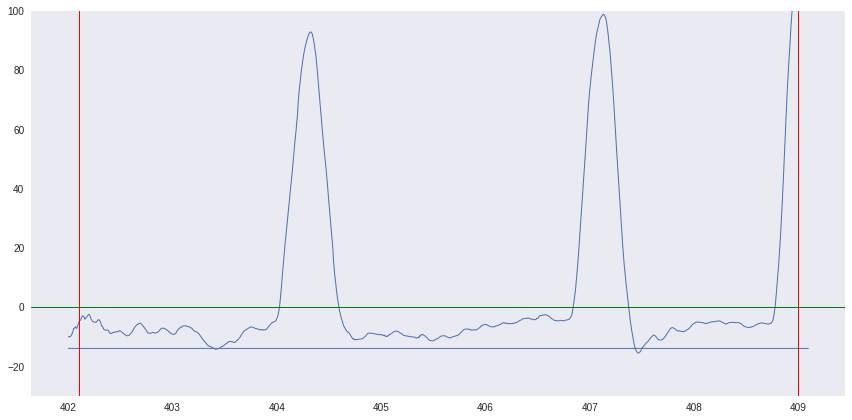

In [21]:
## 402, 407
dd2 = df[df['session_id']==2]
dpart = dd2[(dd2['Time']>402) & (dd2['Time']<409.1)]
xmin, xmax = 402.1, 409

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,100])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


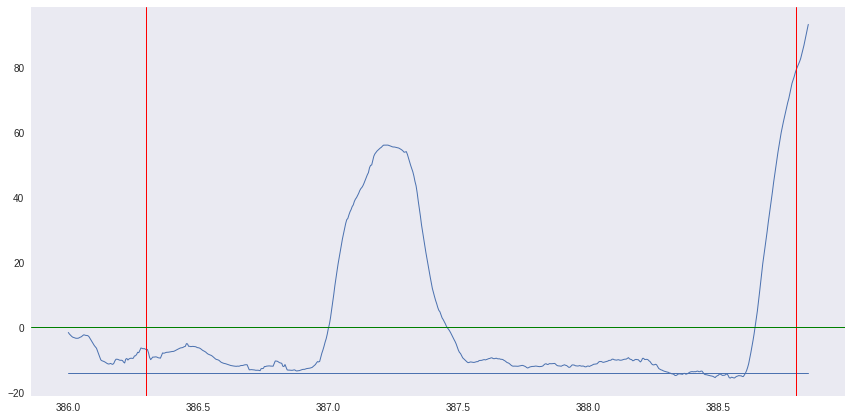

In [22]:
## 386, 388
dpart = dd2[(dd2['Time']>386) & (dd2['Time']<388.85)]
xmin, xmax = 386.3, 388.8

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
